In [1]:
import jax
import jax.numpy as jnp
from arraytainers import Jaxtainer
from approx_post.distributions import approx, joint, mixture
from approx_post import losses, optimisers
import seaborn as sns
import matplotlib.pyplot as plt
sns.set({'figure.facecolor':'white', "figure.figsize":(10,7)})

In [2]:
def create_data(model, true_theta, noise_cov, num_samples, ndim, prngkey):
    mean = model(true_theta)
    samples = jax.random.multivariate_normal(key=prngkey, mean=mean, cov=noise_cov, shape=(num_samples,))
    return samples.reshape(num_samples, -1)

In [3]:
# First, let's define a model:
ndim = 1
model = lambda theta: theta**2
model_grad = jax.vmap(jax.vmap(jax.jacfwd(model), in_axes=0), in_axes=0)

In [17]:
# Create artificial data:
prngkey = jax.random.PRNGKey(10)
true_theta = jnp.array([2])
noise_cov = 1.0*jnp.identity(ndim)
num_samples = 1
data = create_data(model, true_theta, noise_cov, num_samples, ndim, prngkey)
print(f'True theta: \n {true_theta}')
print(f'True x = model(theta): \n {model(true_theta)}')
print(f'Observations x_obs = model(theta) + noise: \n {data}')

True theta: 
 [2]
True x = model(theta): 
 [4]
Observations x_obs = model(theta) + noise: 
 [[2.6554594]]


In [18]:
# Create Joint distribution from forward model:
prior_mean = jnp.zeros(ndim)
prior_cov = 1.*jnp.identity(ndim)
joint_dist = joint.ModelPlusGaussian(model, noise_cov, prior_mean, prior_cov, model_grad)

In [36]:
approx_dist = approx.Gaussian(ndim)
# mix_dist = mixture.Different([approx_dist, approx_dist])
mix_dist = mixture.Identical(approx_dist,4)

perturbation = {f'component_{i}': {'mean': val} for i, val in enumerate([-0.5, 0.5, -0.5, 0.5])}
# perturbation['log_unnorm_coeff'] = [0.112, -0.05]
mix_dist.perturb(perturbation)

prngkey = jax.random.PRNGKey(12)
loss = losses.SELBO(joint_dist, use_reparameterisation=True)
optimiser = optimisers.Adam()
optimiser.fit(mix_dist, loss, data, prngkey, verbose=True, max_iter=100, num_samples=100)

Loss = 3.23947811126709, Params = Jaxtainer({'component_0': {'mean': DeviceArray([-0.40000004], dtype=float32), 'log_chol_diag': DeviceArray([-0.10000001], dtype=float32)}, 'component_1': {'mean': DeviceArray([0.4], dtype=float32), 'log_chol_diag': DeviceArray([-0.1], dtype=float32)}, 'component_2': {'mean': DeviceArray([-0.40000004], dtype=float32), 'log_chol_diag': DeviceArray([-0.1], dtype=float32)}, 'component_3': {'mean': DeviceArray([0.6], dtype=float32), 'log_chol_diag': DeviceArray([-0.1], dtype=float32)}, 'log_unnorm_coeff': DeviceArray([ 0.09999996, -0.09999999,  0.09999998,  0.09999964], dtype=float32)})
Loss = 3.1080918312072754, Params = Jaxtainer({'component_0': {'mean': DeviceArray([-0.42253566], dtype=float32), 'log_chol_diag': DeviceArray([-0.1578453], dtype=float32)}, 'component_1': {'mean': DeviceArray([0.31792745], dtype=float32), 'log_chol_diag': DeviceArray([-0.18392663], dtype=float32)}, 'component_2': {'mean': DeviceArray([-0.45770848], dtype=float32), 'log_chol

Loss = 2.4703149795532227, Params = Jaxtainer({'component_0': {'mean': DeviceArray([-1.1421846], dtype=float32), 'log_chol_diag': DeviceArray([-0.606389], dtype=float32)}, 'component_1': {'mean': DeviceArray([0.2629145], dtype=float32), 'log_chol_diag': DeviceArray([-0.38160023], dtype=float32)}, 'component_2': {'mean': DeviceArray([-1.2999302], dtype=float32), 'log_chol_diag': DeviceArray([-0.78647006], dtype=float32)}, 'component_3': {'mean': DeviceArray([1.498045], dtype=float32), 'log_chol_diag': DeviceArray([-1.1943585], dtype=float32)}, 'log_unnorm_coeff': DeviceArray([-0.7166979 , -1.190139  ,  0.47914574,  0.9822622 ], dtype=float32)})
Loss = 2.456307888031006, Params = Jaxtainer({'component_0': {'mean': DeviceArray([-1.1753219], dtype=float32), 'log_chol_diag': DeviceArray([-0.6634555], dtype=float32)}, 'component_1': {'mean': DeviceArray([0.2738539], dtype=float32), 'log_chol_diag': DeviceArray([-0.38419163], dtype=float32)}, 'component_2': {'mean': DeviceArray([-1.3577415], 

Loss = 2.4205222129821777, Params = Jaxtainer({'component_0': {'mean': DeviceArray([-1.0357097], dtype=float32), 'log_chol_diag': DeviceArray([-0.99001956], dtype=float32)}, 'component_1': {'mean': DeviceArray([0.27890024], dtype=float32), 'log_chol_diag': DeviceArray([-0.44934967], dtype=float32)}, 'component_2': {'mean': DeviceArray([-1.4596624], dtype=float32), 'log_chol_diag': DeviceArray([-1.3103404], dtype=float32)}, 'component_3': {'mean': DeviceArray([1.4545722], dtype=float32), 'log_chol_diag': DeviceArray([-0.9144789], dtype=float32)}, 'log_unnorm_coeff': DeviceArray([-0.9384626, -1.0957127,  0.8577669,  0.842326 ], dtype=float32)})
Loss = 2.413203477859497, Params = Jaxtainer({'component_0': {'mean': DeviceArray([-0.9828401], dtype=float32), 'log_chol_diag': DeviceArray([-0.992325], dtype=float32)}, 'component_1': {'mean': DeviceArray([0.27062497], dtype=float32), 'log_chol_diag': DeviceArray([-0.4572451], dtype=float32)}, 'component_2': {'mean': DeviceArray([-1.4459583], dt

Loss = 2.392488718032837, Params = Jaxtainer({'component_0': {'mean': DeviceArray([-0.81695485], dtype=float32), 'log_chol_diag': DeviceArray([-0.9966495], dtype=float32)}, 'component_1': {'mean': DeviceArray([0.18296343], dtype=float32), 'log_chol_diag': DeviceArray([-0.510461], dtype=float32)}, 'component_2': {'mean': DeviceArray([-1.4134631], dtype=float32), 'log_chol_diag': DeviceArray([-1.0995609], dtype=float32)}, 'component_3': {'mean': DeviceArray([1.4144102], dtype=float32), 'log_chol_diag': DeviceArray([-0.9314833], dtype=float32)}, 'log_unnorm_coeff': DeviceArray([-0.88793814, -0.8306013 ,  0.6964069 ,  0.80919033], dtype=float32)})
Loss = 2.39070463180542, Params = Jaxtainer({'component_0': {'mean': DeviceArray([-0.84703255], dtype=float32), 'log_chol_diag': DeviceArray([-0.9949047], dtype=float32)}, 'component_1': {'mean': DeviceArray([0.18259469], dtype=float32), 'log_chol_diag': DeviceArray([-0.5110674], dtype=float32)}, 'component_2': {'mean': DeviceArray([-1.419738], d

Loss = 2.3884522914886475, Params = Jaxtainer({'component_0': {'mean': DeviceArray([-1.0051365], dtype=float32), 'log_chol_diag': DeviceArray([-0.9286609], dtype=float32)}, 'component_1': {'mean': DeviceArray([0.2403617], dtype=float32), 'log_chol_diag': DeviceArray([-0.54008526], dtype=float32)}, 'component_2': {'mean': DeviceArray([-1.4103734], dtype=float32), 'log_chol_diag': DeviceArray([-1.1228844], dtype=float32)}, 'component_3': {'mean': DeviceArray([1.4151568], dtype=float32), 'log_chol_diag': DeviceArray([-1.0147781], dtype=float32)}, 'log_unnorm_coeff': DeviceArray([-1.1897467 , -0.79247075,  0.73378485,  0.8586031 ], dtype=float32)})
Loss = 2.387742519378662, Params = Jaxtainer({'component_0': {'mean': DeviceArray([-0.9993126], dtype=float32), 'log_chol_diag': DeviceArray([-0.92052925], dtype=float32)}, 'component_1': {'mean': DeviceArray([0.24348241], dtype=float32), 'log_chol_diag': DeviceArray([-0.54396224], dtype=float32)}, 'component_2': {'mean': DeviceArray([-1.4058006

KeyboardInterrupt: 

In [7]:
mix_dist.add_component()

In [ ]:
def filter(grad):
    for i in range(1):
        grad[f'component_{i}'] = 0*grad[f'component_{i}']
    grad['log_unnorm_coeff'] = 0*grad['log_unnorm_coeff']
    return grad

perturbation = {'component_0': 0., 
                'component_1': Jaxtainer({'mean':0.5, 'log_chol_diag': -0.1}) , 
                'log_unnorm_coeff': 0.}
mix_dist.perturb(perturbation)

optimiser.fit(mix_dist, loss, data, prngkey, grad_filter=filter, verbose = True, max_iter=100, num_samples=1000)

In [ ]:
def filter(grad):
    for i in range(2):
        grad[f'component_{i}'] = 0*grad[f'component_{i}']
    return grad

optimiser.fit(mix_dist, loss, data, prngkey, grad_filter=filter, verbose = True, max_iter=100, num_samples=1000)

In [32]:
def plot_posteriors(approx_dist, theta=None):
    if theta is None:
        theta = jnp.atleast_2d(jnp.linspace(-3, 3, 5000)).reshape(1,-1,1)
    pdf = jnp.exp(approx_dist.logpdf(theta))
    ax = sns.lineplot(x=theta.squeeze(), y=pdf.squeeze())
    ax.fill_between(theta.squeeze(), pdf.squeeze(), alpha=0.2)
    plt.xlabel("Parameter $\Theta$")
    plt.ylabel("Posterior Probability Density")

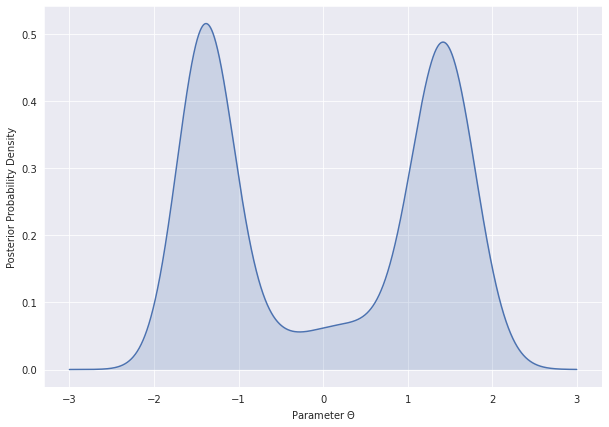

In [37]:
plot_posteriors(mix_dist)

In [22]:
mix_dist.phi()

Jaxtainer({'component_0': {'mean': DeviceArray([[-0.79080737]], dtype=float32), 'log_chol_diag': DeviceArray([[-1.0969846]], dtype=float32)}, 'component_1': {'mean': DeviceArray([[-1.4354398]], dtype=float32), 'log_chol_diag': DeviceArray([[-0.95076656]], dtype=float32)}, 'component_2': {'mean': DeviceArray([[1.4232812]], dtype=float32), 'log_chol_diag': DeviceArray([[-0.8868339]], dtype=float32)}, 'component_3': {'mean': DeviceArray([[0.7201096]], dtype=float32), 'log_chol_diag': DeviceArray([[-1.1042489]], dtype=float32)}, 'log_unnorm_coeff': DeviceArray([[-1.295004 ,  1.2145451,  1.1988562, -1.1514769]], dtype=float32)})